Yeast Cells 
Dice Score: self-implemented K means vs sklearn 


## *Plot Dice Score / N2DL-HeLa Dataset
# Otsu vs. kmeans vs. Ground Truth

# **Comparison** - Evaluate with the Dice Score: Is the bilateral filter or the gauß filter better? 

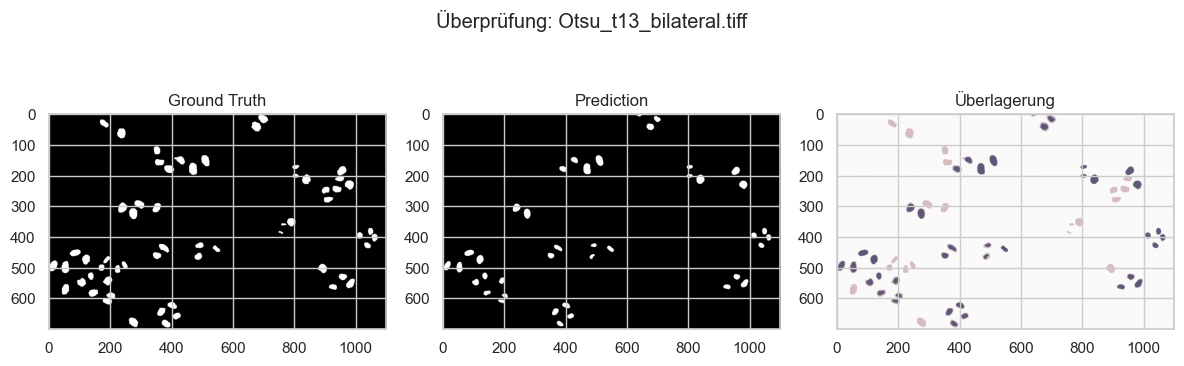

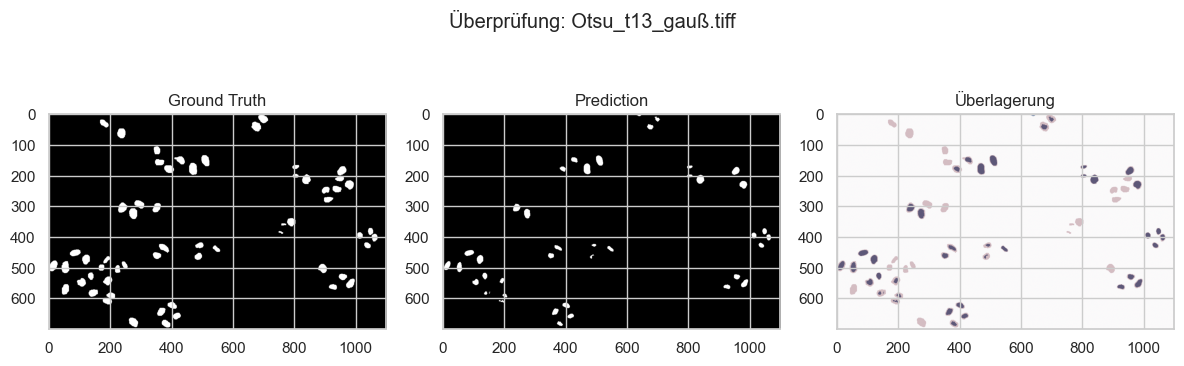

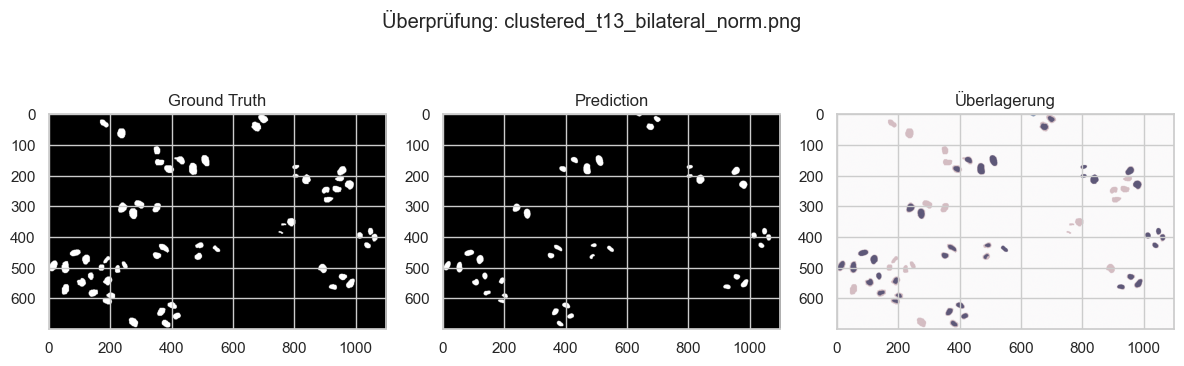

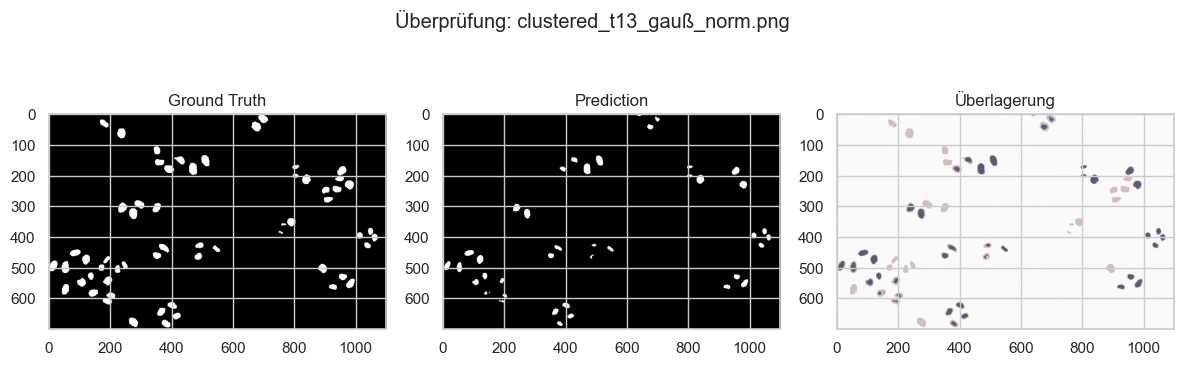

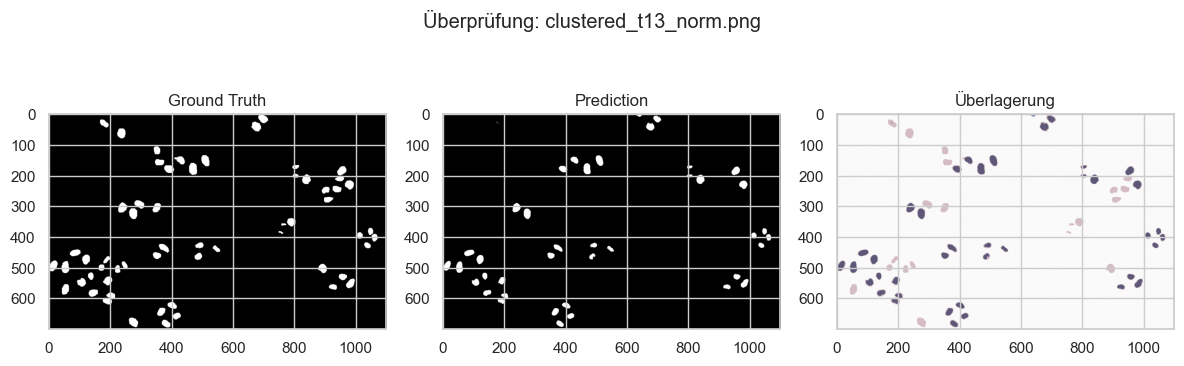

/Users/davidlehmann/Documents/GitHub/topic01_team04/Code/Functions/Dice_coefficient.py:314: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df, x='Bild', y='DiceScore', palette=colors, edgecolor='black')


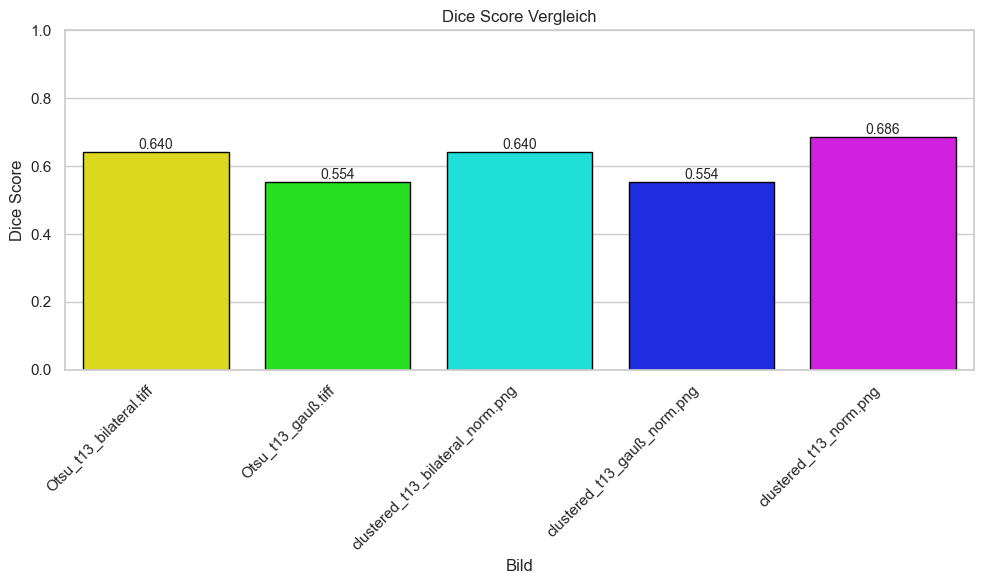

,Bild,DiceScore
0,Otsu_t13_bilateral.tiff,0.640201
1,Otsu_t13_gauß.tiff,0.554465
2,clustered_t13_bilateral_norm.png,0.640201
3,clustered_t13_gauß_norm.png,0.554465
4,clustered_t13_norm.png,0.685596


In [4]:
from Functions.Dice_coefficient import evaluate_and_plot_dice
from Functions.Dice_coefficient import evaluate_and_plot_dice_colored

image_pairs = [
    ('Images/Datenvorbereitung_Images/Otsu/Otsu_Filtered_t13/Otsu_t13_bilateral.tiff',
     'Original_Images/Otsu/Data/N2DL-HeLa/gt/man_seg13.tif'),

    ('Images/Datenvorbereitung_Images/Otsu/Otsu_Filtered_t13/Otsu_t13_gauß.tiff',
     'Original_Images/Otsu/Data/N2DL-HeLa/gt/man_seg13.tif'),

    ('Images/Segmented_Images/clustered_t13_bilateral_norm.png',
     'Original_Images/Otsu/Data/N2DL-HeLa/gt/man_seg13.tif'),

    ('Images/Segmented_Images/clustered_t13_gauß_norm.png',
     'Original_Images/Otsu/Data/N2DL-HeLa/gt/man_seg13.tif'),

    ('Images/Segmented_Images/clustered_t13_norm.png',
     'Original_Images/Otsu/Data/N2DL-HeLa/gt/man_seg13.tif'),

]

evaluate_and_plot_dice_colored(image_pairs)


# **Dice Score** -  Otsu vs. self-implemented kmeans vs. Ground Truth #

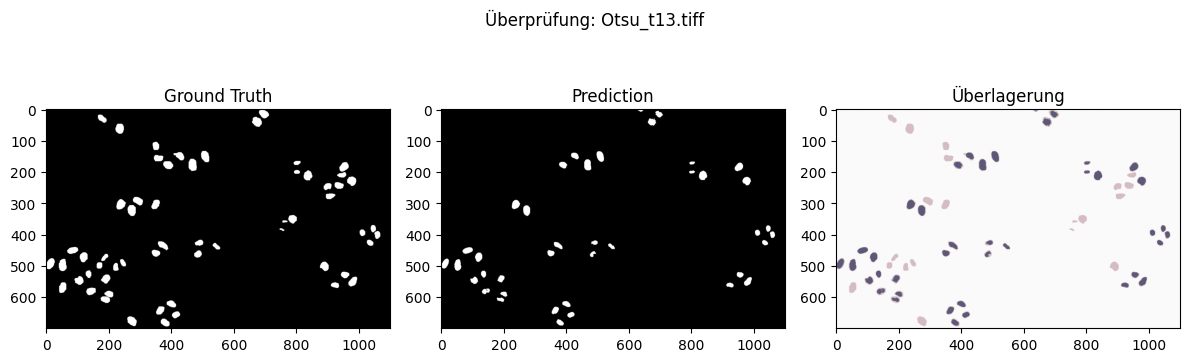

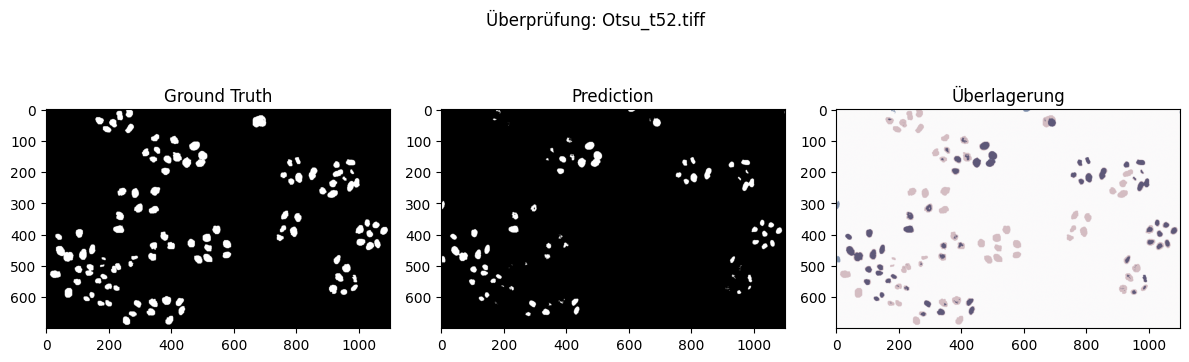

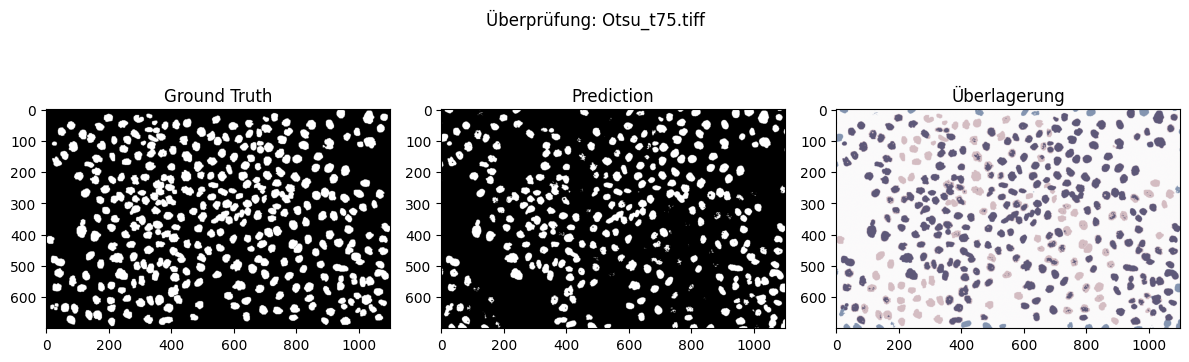

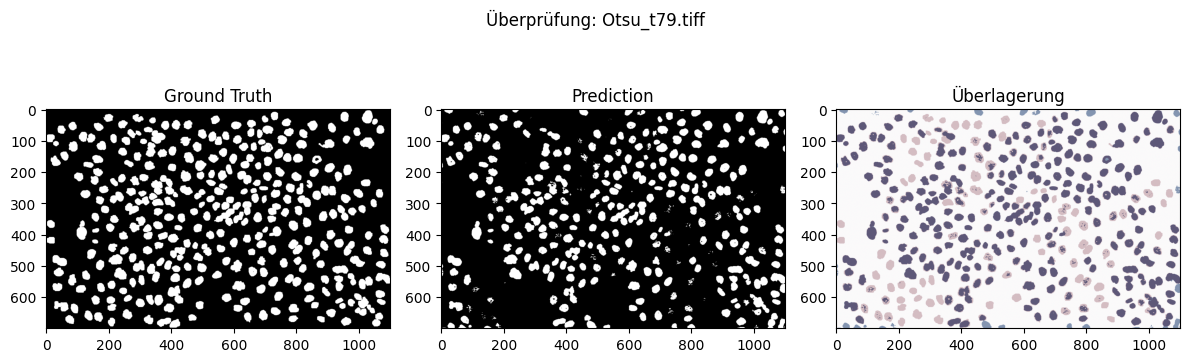

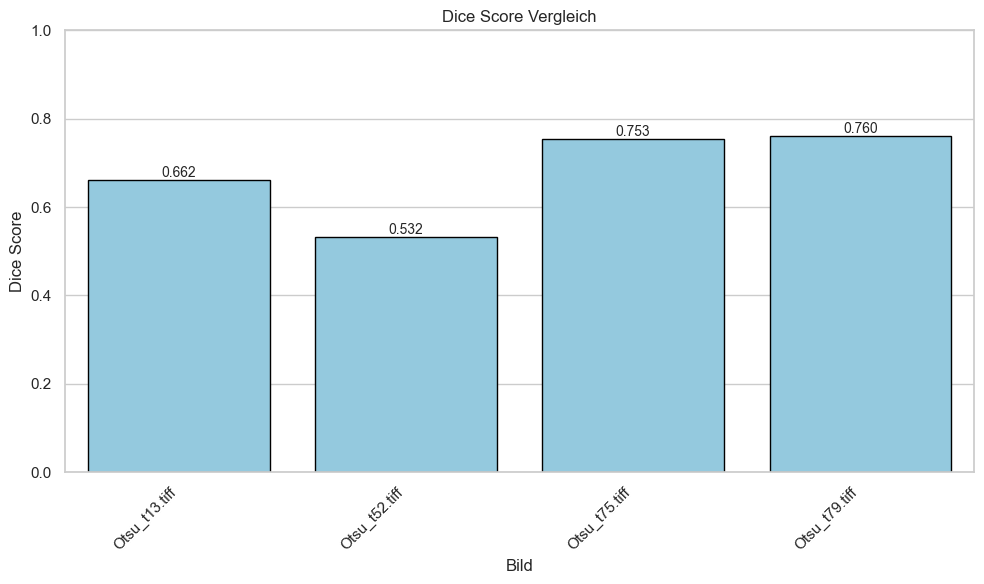

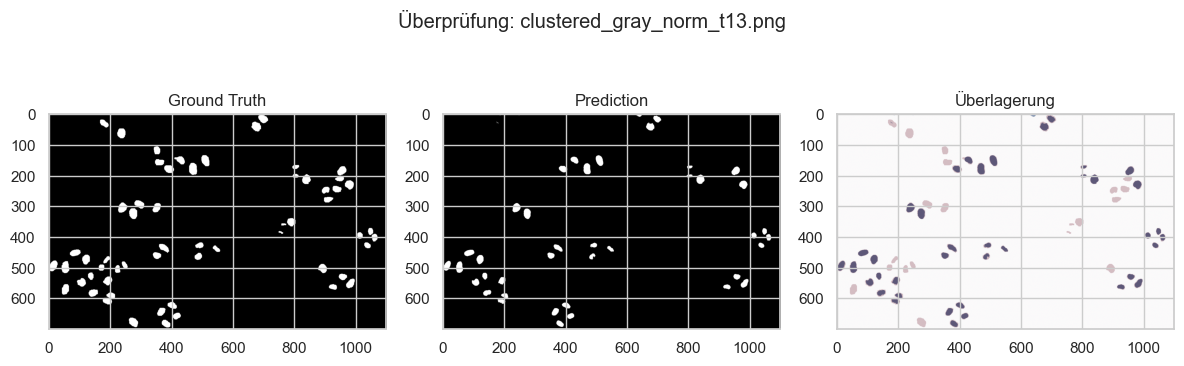

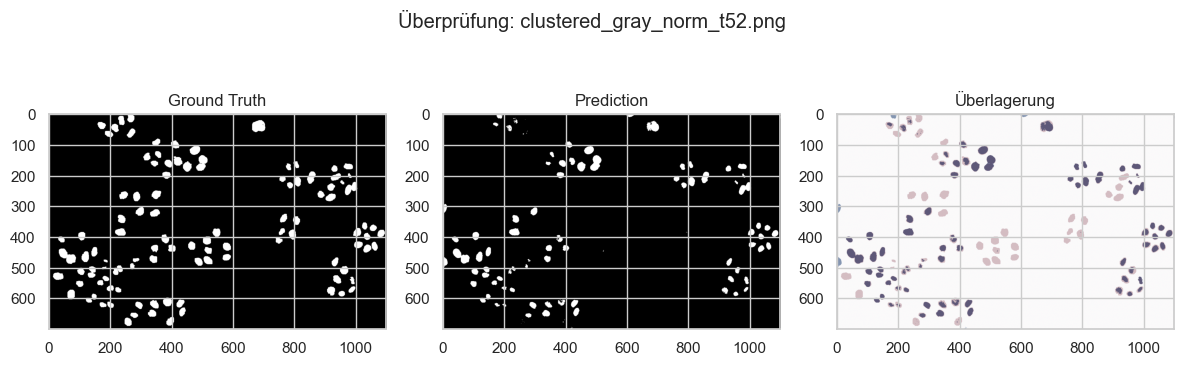

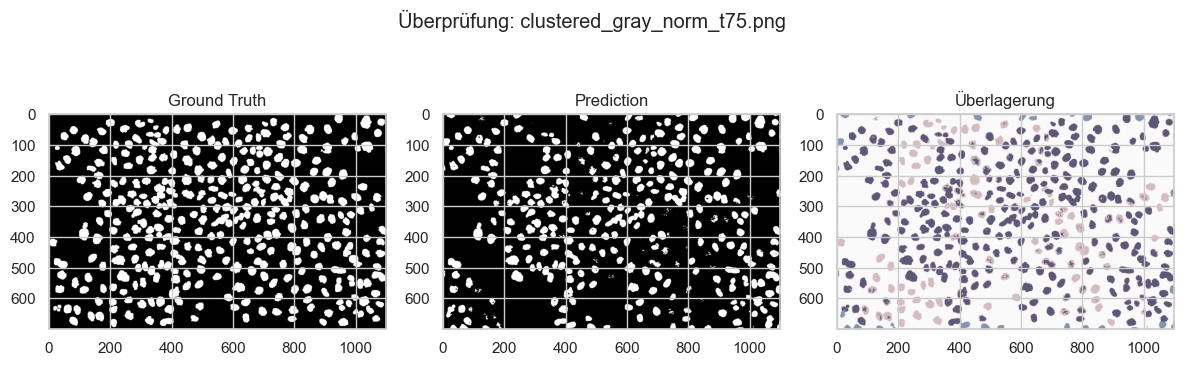

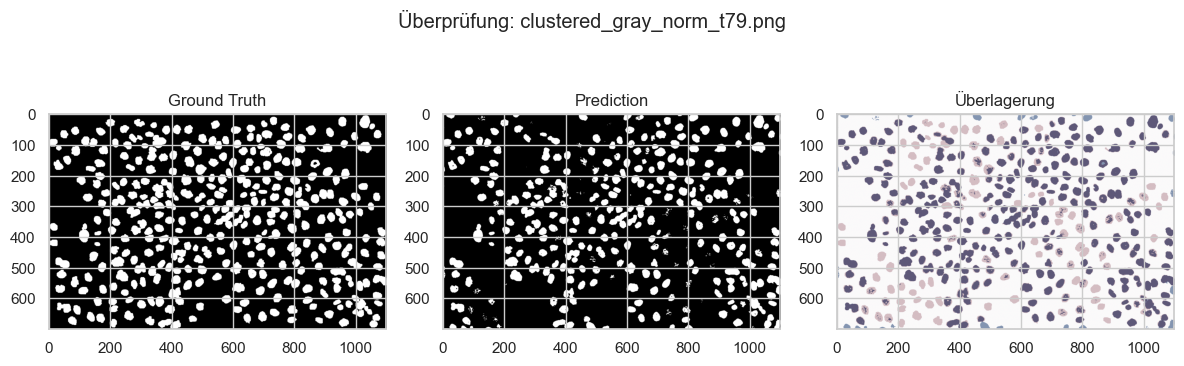

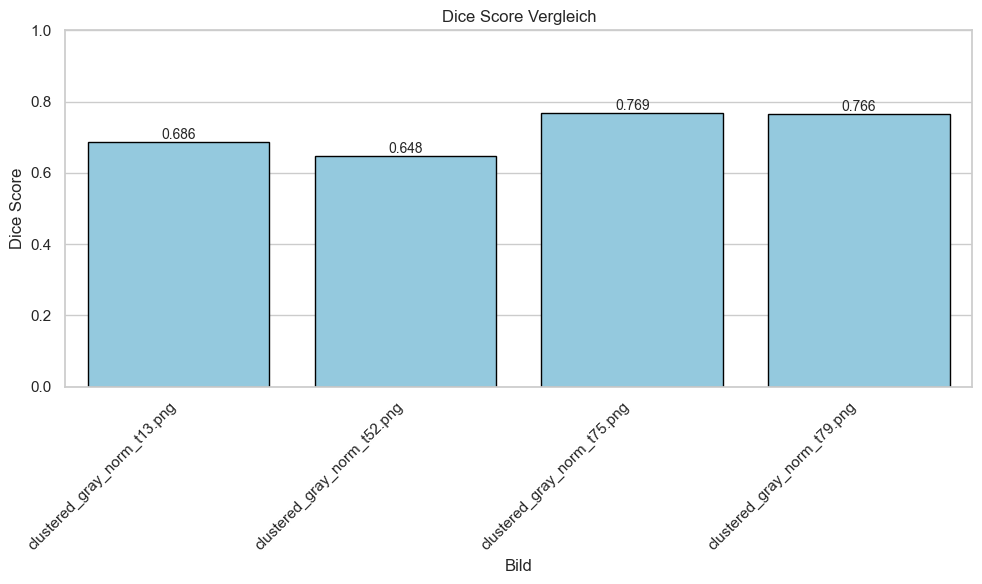

                          Bild  DiceScore
0                Otsu_t13.tiff   0.662435
1                Otsu_t52.tiff   0.532181
2                Otsu_t75.tiff   0.752988
3                Otsu_t79.tiff   0.759849
4  clustered_gray_norm_t13.png   0.685596
5  clustered_gray_norm_t52.png   0.647874
6  clustered_gray_norm_t75.png   0.769187
7  clustered_gray_norm_t79.png   0.766019


In [2]:
from Functions.Dice_coefficient import evaluate_and_plot_dice
import pandas as pd

otsu_pairs = [
    ('Images/Datenvorbereitung_Images/Otsu/Otus_Original/Otsu_t13.tiff', 'Original_Images/Otsu/Data/N2DL-HeLa/gt/man_seg13.tif'),
    ('Images/Datenvorbereitung_Images/Otsu/Otus_Original/Otsu_t52.tiff', 'Original_Images/Otsu/Data/N2DL-HeLa/gt/man_seg52.tif'),
    ('Images/Datenvorbereitung_Images/Otsu/Otus_Original/Otsu_t75.tiff', 'Original_Images/Otsu/Data/N2DL-HeLa/gt/man_seg75.tif'),
    ('Images/Datenvorbereitung_Images/Otsu/Otus_Original/Otsu_t79.tiff', 'Original_Images/Otsu/Data/N2DL-HeLa/gt/man_seg79.tif'),
]

kmeans_pairs = [
    ('Images/Segmented_Images/SegIntoTwoClusters/grayscale_segmented_images/clustered_gray_norm_t13.png', 'Original_Images/Otsu/Data/N2DL-HeLa/gt/man_seg13.tif'),
    ('Images/Segmented_Images/SegIntoTwoClusters/grayscale_segmented_images/clustered_gray_norm_t52.png', 'Original_Images/Otsu/Data/N2DL-HeLa/gt/man_seg52.tif'),
    ('Images/Segmented_Images/SegIntoTwoClusters/grayscale_segmented_images/clustered_gray_norm_t75.png', 'Original_Images/Otsu/Data/N2DL-HeLa/gt/man_seg75.tif'),
    ('Images/Segmented_Images/SegIntoTwoClusters/grayscale_segmented_images/clustered_gray_norm_t79.png', 'Original_Images/Otsu/Data/N2DL-HeLa/gt/man_seg79.tif'),
]

df_otsu = evaluate_and_plot_dice(otsu_pairs)
df_kmeans = evaluate_and_plot_dice(kmeans_pairs)

combined_df = pd.concat([df_otsu, df_kmeans], ignore_index=True)
print(combined_df)

Dice Score Cell Nuclei - self implemented vs. kmeans

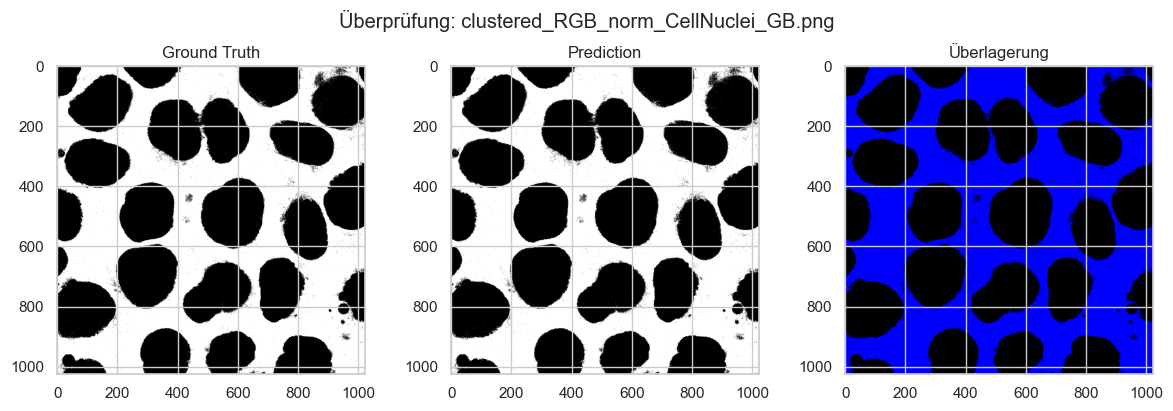

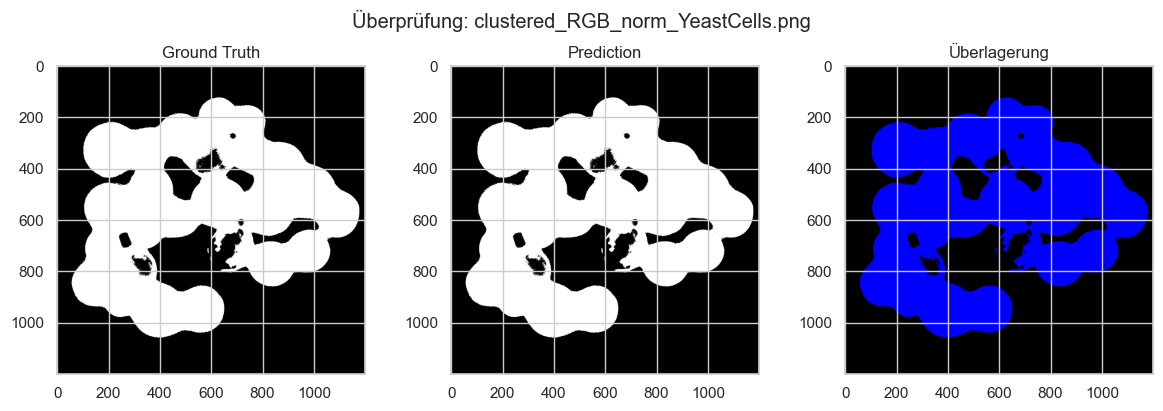

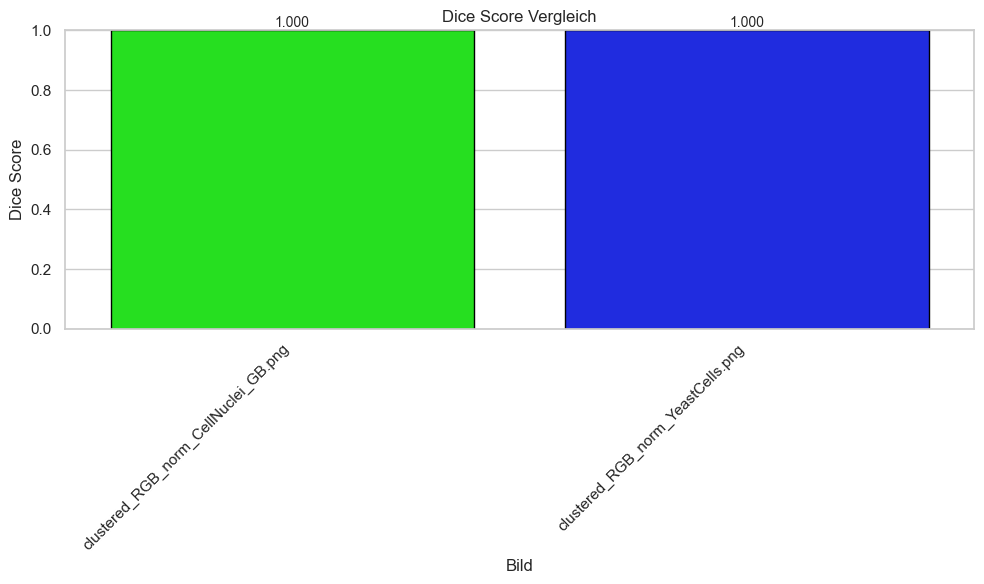

,Bild,DiceScore
0,clustered_RGB_norm_CellNuclei_GB.png,1.0
1,clustered_RGB_norm_YeastCells.png,1.0


In [2]:
from Functions.Dice_coefficient_correct_loading import evaluate_and_plot_dice_cells


image_pairs = [
    ('Images/Segmented_Images/SegIntoTwoClusters/RGB_segmented_images/clustered_RGB_norm_CellNuclei_GB.png',
     'Images/sklearn_segmented_images/Cell_Nuclei_sk_learn/CellNuclei_GB_skclustered.tiff'),
    ('Images/Segmented_Images/SegIntoTwoClusters/RGB_segmented_images/clustered_RGB_norm_YeastCells.png',
     'Images/sklearn_segmented_images/Yeast Cells_sk_ learn /Yeast_Cells_skclustered_Original.png.tiff'),

]

evaluate_and_plot_dice_cells(image_pairs)

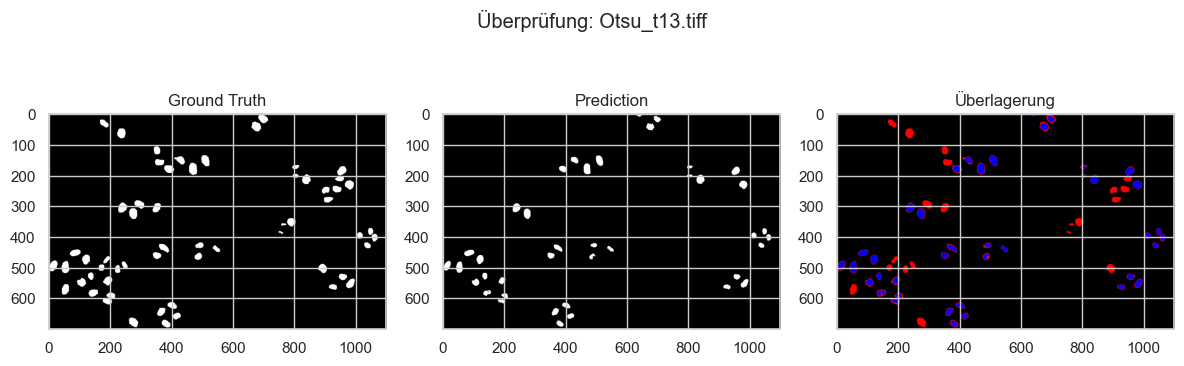

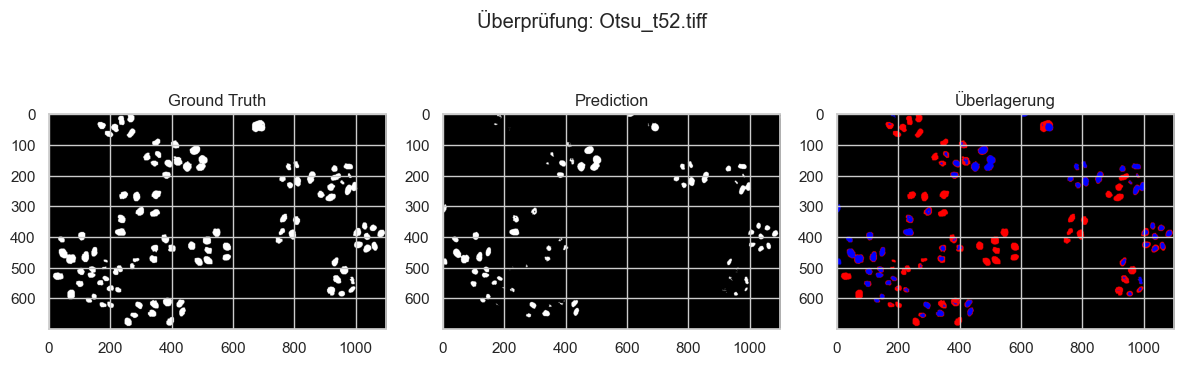

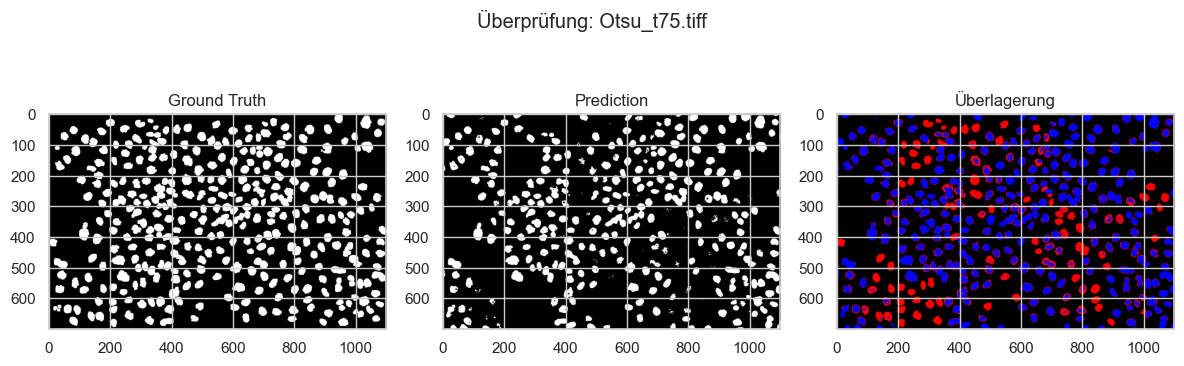

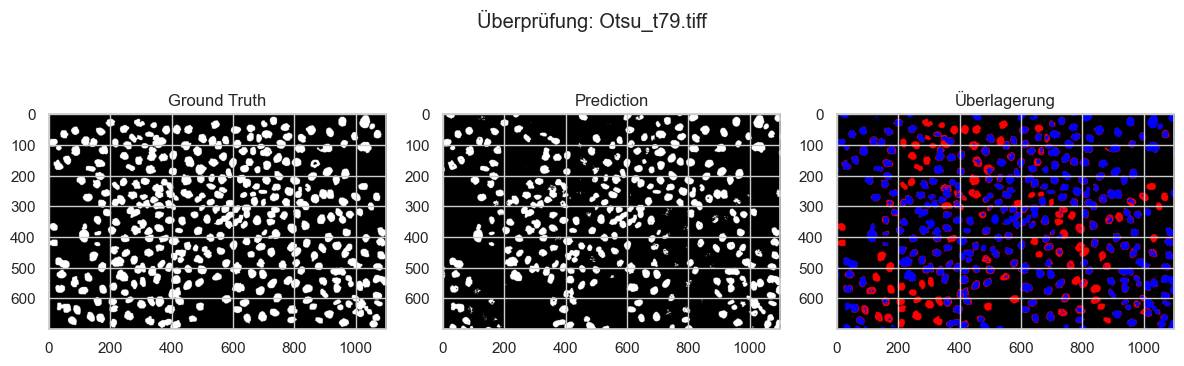

/Users/davidlehmann/Documents/GitHub/topic01_team04/Code/Functions/Dice_coefficient_correct_loading.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df, x='Bild', y='DiceScore', palette=colors, edgecolor='black')


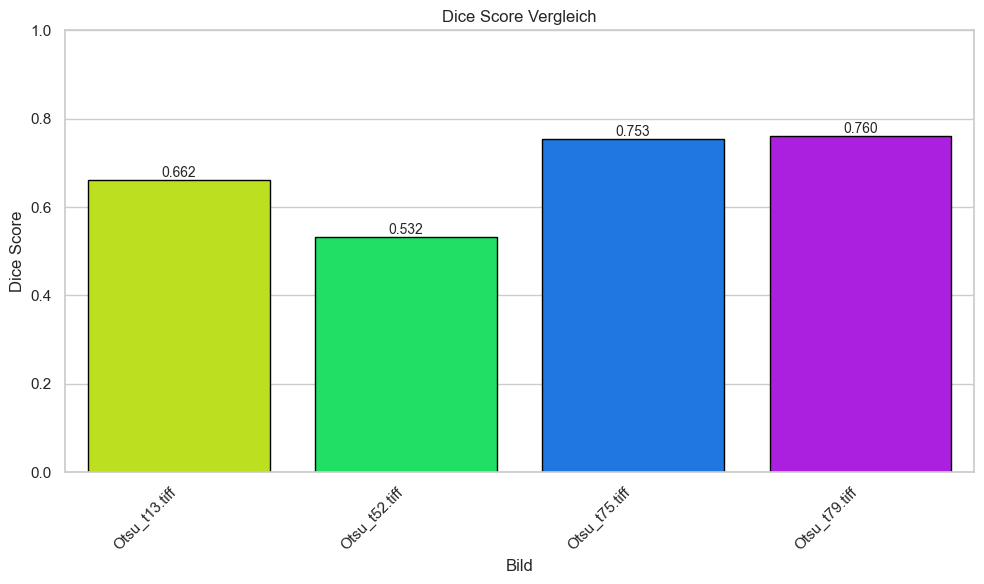

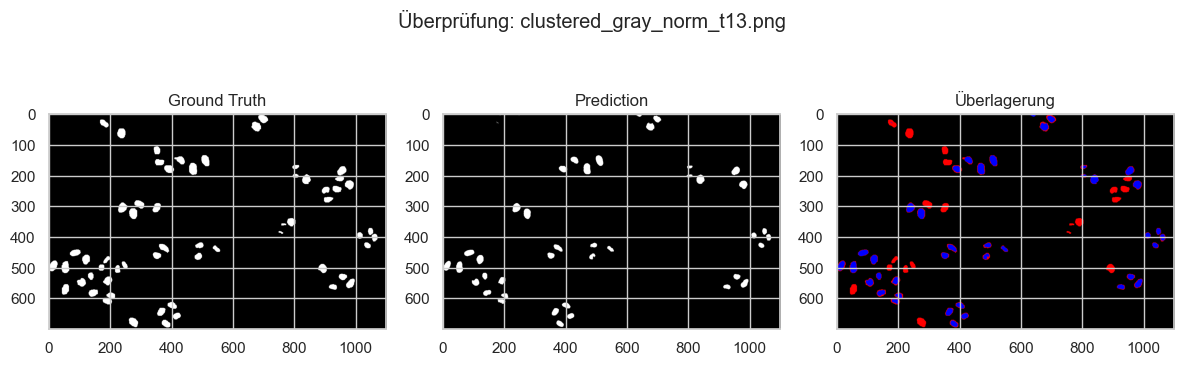

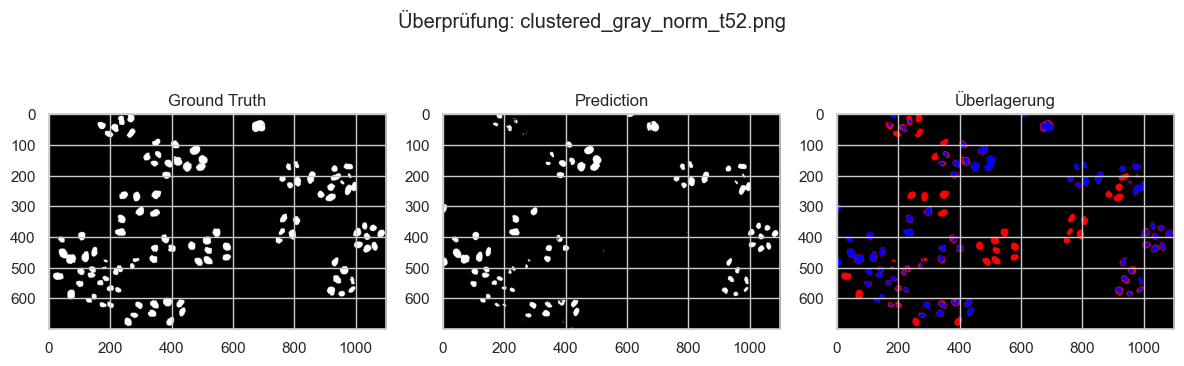

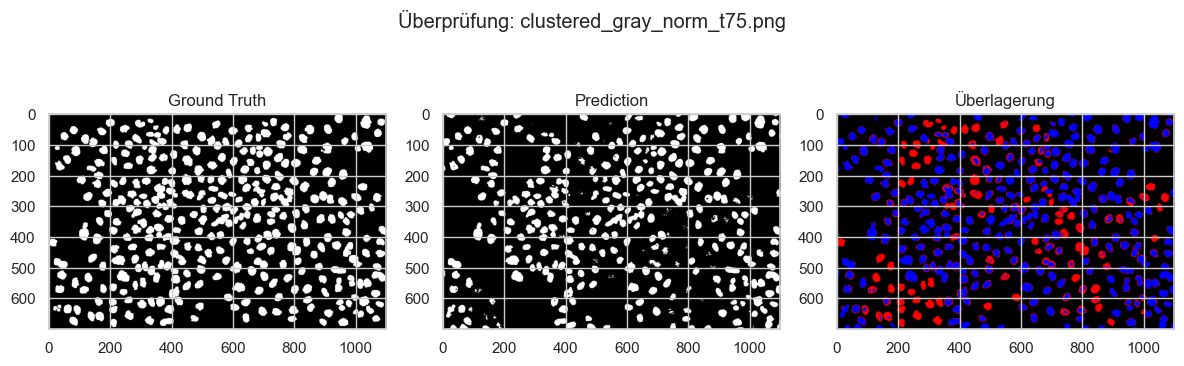

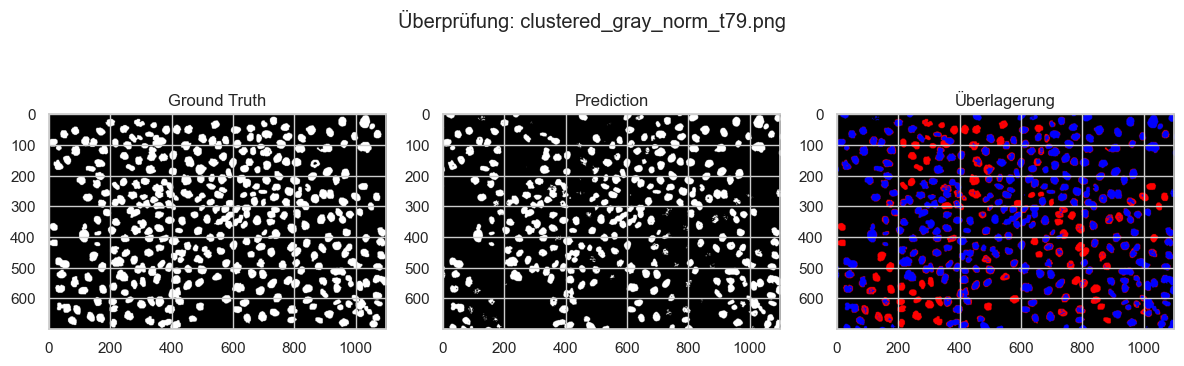

/Users/davidlehmann/Documents/GitHub/topic01_team04/Code/Functions/Dice_coefficient_correct_loading.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df, x='Bild', y='DiceScore', palette=colors, edgecolor='black')


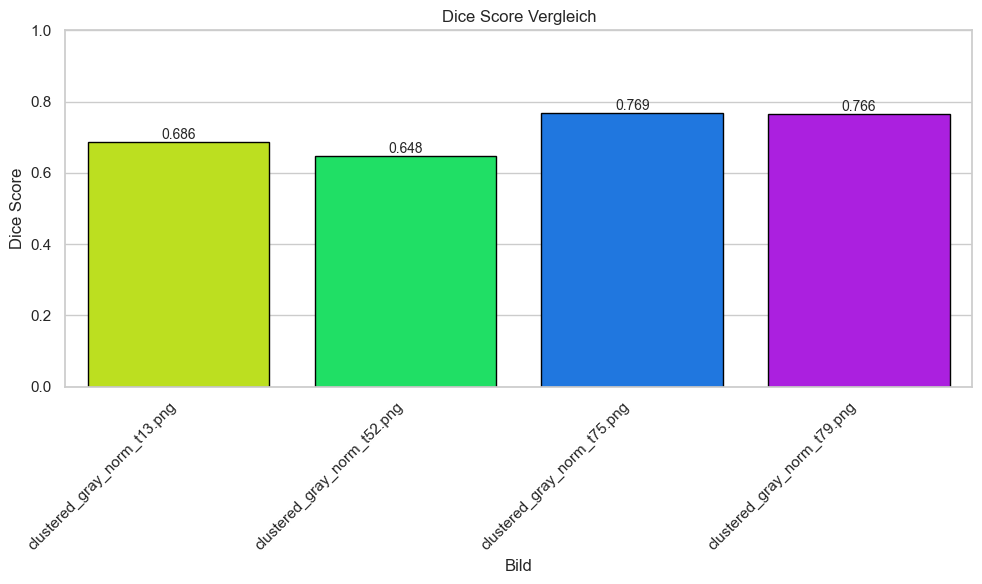

                          Bild  DiceScore
0                Otsu_t13.tiff   0.662428
1                Otsu_t52.tiff   0.532174
2                Otsu_t75.tiff   0.752987
3                Otsu_t79.tiff   0.759848
4  clustered_gray_norm_t13.png   0.685589
5  clustered_gray_norm_t52.png   0.647869
6  clustered_gray_norm_t75.png   0.769186
7  clustered_gray_norm_t79.png   0.766018


In [11]:
from Functions.Dice_coefficient_correct_loading import evaluate_and_plot_dice_cells
import pandas as pd

otsu_pairs = [
    ('Images/Datenvorbereitung_Images/Otsu/Otus_Original/Otsu_t13.tiff', 'Original_Images/Otsu/Data/N2DL-HeLa/gt/man_seg13.tif'),
    ('Images/Datenvorbereitung_Images/Otsu/Otus_Original/Otsu_t52.tiff', 'Original_Images/Otsu/Data/N2DL-HeLa/gt/man_seg52.tif'),
    ('Images/Datenvorbereitung_Images/Otsu/Otus_Original/Otsu_t75.tiff', 'Original_Images/Otsu/Data/N2DL-HeLa/gt/man_seg75.tif'),
    ('Images/Datenvorbereitung_Images/Otsu/Otus_Original/Otsu_t79.tiff', 'Original_Images/Otsu/Data/N2DL-HeLa/gt/man_seg79.tif'),
]

kmeans_pairs = [
    ('Images/Segmented_Images/SegIntoTwoClusters/grayscale_segmented_images/clustered_gray_norm_t13.png', 'Original_Images/Otsu/Data/N2DL-HeLa/gt/man_seg13.tif'),
    ('Images/Segmented_Images/SegIntoTwoClusters/grayscale_segmented_images/clustered_gray_norm_t52.png', 'Original_Images/Otsu/Data/N2DL-HeLa/gt/man_seg52.tif'),
    ('Images/Segmented_Images/SegIntoTwoClusters/grayscale_segmented_images/clustered_gray_norm_t75.png', 'Original_Images/Otsu/Data/N2DL-HeLa/gt/man_seg75.tif'),
    ('Images/Segmented_Images/SegIntoTwoClusters/grayscale_segmented_images/clustered_gray_norm_t79.png', 'Original_Images/Otsu/Data/N2DL-HeLa/gt/man_seg79.tif'),
]

df_otsu = evaluate_and_plot_dice_cells(otsu_pairs)
df_kmeans = evaluate_and_plot_dice_cells(kmeans_pairs)

combined_df = pd.concat([df_otsu, df_kmeans], ignore_index=True)
print(combined_df)